In [151]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
from plato.instrument import NoiseModel
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [153]:
n_cameras = 22
m = NoiseModel()

In [154]:
def noise_to_flux(noise):
    return 1 / (n_cameras * m.n_images * noise**2 * m.n_photoelectrons_ref)

In [155]:
ref = pd.DataFrame(
    {
        "mag": [8, 9, 10, 11, 12, 13, 14, 15, 16],
        "noise": np.array([10.3, 16.3, 26.2, 42.2, 68.9, 114.0, 190.1, 315.0, 513.7])
        * 1e-6,
    }
)

ref["flux"] = noise_to_flux(ref["noise"])

In [156]:
ref["noise"] * 1e6

0     10.3
1     16.3
2     26.2
3     42.2
4     68.9
5    114.0
6    190.1
7    315.0
8    513.7
Name: noise, dtype: float64

In [157]:
m.photon_noise(ref["mag"], 22) * 1e6

0      9.944732
1     16.251166
2     26.556814
3     43.397772
4     70.918395
5    115.891172
6    189.383358
7    309.480486
8    505.737000
Name: mag, dtype: float64

In [158]:
def flux(x, A, B):
    return 10**A * 10 ** (-0.4 * B * (x - 11))

In [159]:
# fit relative deviation
from scipy.optimize import minimize


def relative_deviation(params):
    A, B = params
    return np.sum(
        np.abs((flux(ref["mag"], A, B)) - ref["flux"]) ** 2 / ref["flux"] ** 2
    )


res = minimize(relative_deviation, x0=[7, 1])

In [160]:
res.x

array([-0.03690695,  1.06675795])

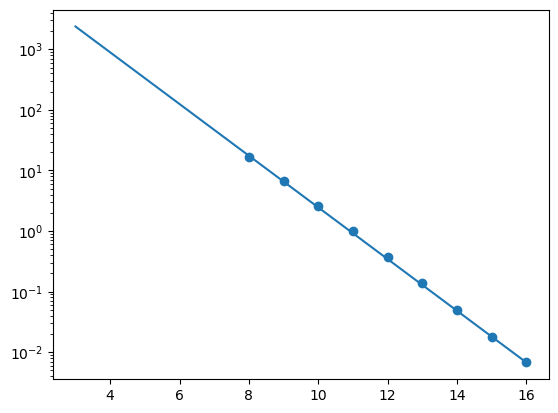

In [161]:
plt.scatter(ref["mag"], ref["flux"])
xline = np.linspace(3, 16, 100)
plt.plot(xline, flux(xline, *res.x))
plt.yscale("log")

In [162]:
m.calculate_NSR(ref["mag"], n_cameras, stellar_variability=0) * 1e6

0      13.581695
1      19.106699
2      29.949760
3      51.685473
4      99.668480
5     217.547369
6     524.918663
7    1341.757478
8    3521.318852
Name: mag, dtype: float64

In [163]:
A, B = res.x

In [164]:
np.abs((flux(ref["mag"], A, B)) - ref["flux"]) / ref["flux"] * 1e2

0    4.203132
1    2.303647
2    5.506368
3    8.225573
4    8.413377
5    6.135770
6    2.287196
7    0.439645
8    0.000003
dtype: float64